基于data/catdogs/training_set 下的猫狗数据集，训练一个卷积神经网络，并用测试集测试其准确率。
1. 导入必要的库
2. 识别图片中的猫/狗,计算dataset/testing_set下的数据预测准确率
3. 从网站下载猫狗图片，并对其进行预测。

catdogs 数据从百度网盘下载

通过网盘分享的文件：catdogs.zip

链接: https://pan.baidu.com/s/1ooAifZMxVf66rp7AmoNy-Q 提取码: h9gc



In [1]:
#load the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/catdogs/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 25000 images belonging to 2 classes.


In [3]:
#set up the cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model= Sequential()
# 输入层
model.add(Input(shape=(64,64,3)))
#卷积层
model.add(Conv2D(32, (3,3), activation='relu'))
#池化层
model.add(MaxPooling2D(pool_size=(2,2)))
#卷积层
model.add(Conv2D(32, (3,3), activation='relu'))
#池化层
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten层
model.add(Flatten())

#全连接层
model.add(Dense(units=128, activation='relu'))

#输出层
model.add(Dense(units=1, activation='sigmoid'))


In [4]:
#configure the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#train the model
model.fit(training_set, epochs=25)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.5913 - loss: 0.6693
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.7588 - loss: 0.5023
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.8001 - loss: 0.4353
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8195 - loss: 0.3957
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.8501 - loss: 0.3414
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.8720 - loss: 0.2983
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.8972 - loss: 0.2428
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9226 - loss: 0.1926
Epoch 9/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9481 - loss: 0.1411
Epoch 10/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9610 - loss: 0.1029
Epoch 11/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9773 - loss: 0.0667
Epoch 12/25
782/782 ━━━━━━━━━━

In [6]:
#accuacy on the training set
accuacy_train = model.evaluate(training_set)
print('Accuracy on the training set:', accuacy_train)

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.9983 - loss: 0.0066
Accuracy on the training set: [0.006373488809913397, 0.9982799887657166]


In [12]:
#load the test data
test_set = train_datagen.flow_from_directory('data/catdogs/testing_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')
print(training_set.directory, training_set.class_indices, training_set.class_mode)



Found 22 images belonging to 2 classes.
data/catdogs/training_set {'cats': 0, 'dogs': 1} binary


['data/catdogs/testing_set\\cats\\14.jpg', 'data/catdogs/testing_set\\dogs\\4.jpg', 'data/catdogs/testing_set\\cats\\10.jpg', 'data/catdogs/testing_set\\cats\\6.jpg', 'data/catdogs/testing_set\\cats\\16.jpg', 'data/catdogs/testing_set\\cats\\8.jpg', 'data/catdogs/testing_set\\cats\\5.jpg', 'data/catdogs/testing_set\\dogs\\24.jpg', 'data/catdogs/testing_set\\dogs\\1.jpg', 'data/catdogs/testing_set\\dogs\\3.jpg', 'data/catdogs/testing_set\\cats\\15.jpg', 'data/catdogs/testing_set\\dogs\\30.jpg', 'data/catdogs/testing_set\\dogs\\2.jpg', 'data/catdogs/testing_set\\dogs\\27.jpg', 'data/catdogs/testing_set\\cats\\11.jpg', 'data/catdogs/testing_set\\cats\\7.jpg', 'data/catdogs/testing_set\\cats\\9.jpg', 'data/catdogs/testing_set\\dogs\\23.jpg', 'data/catdogs/testing_set\\dogs\\49.jpg', 'data/catdogs/testing_set\\cats\\13.jpg', 'data/catdogs/testing_set\\dogs\\31.jpg', 'data/catdogs/testing_set\\dogs\\21.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━

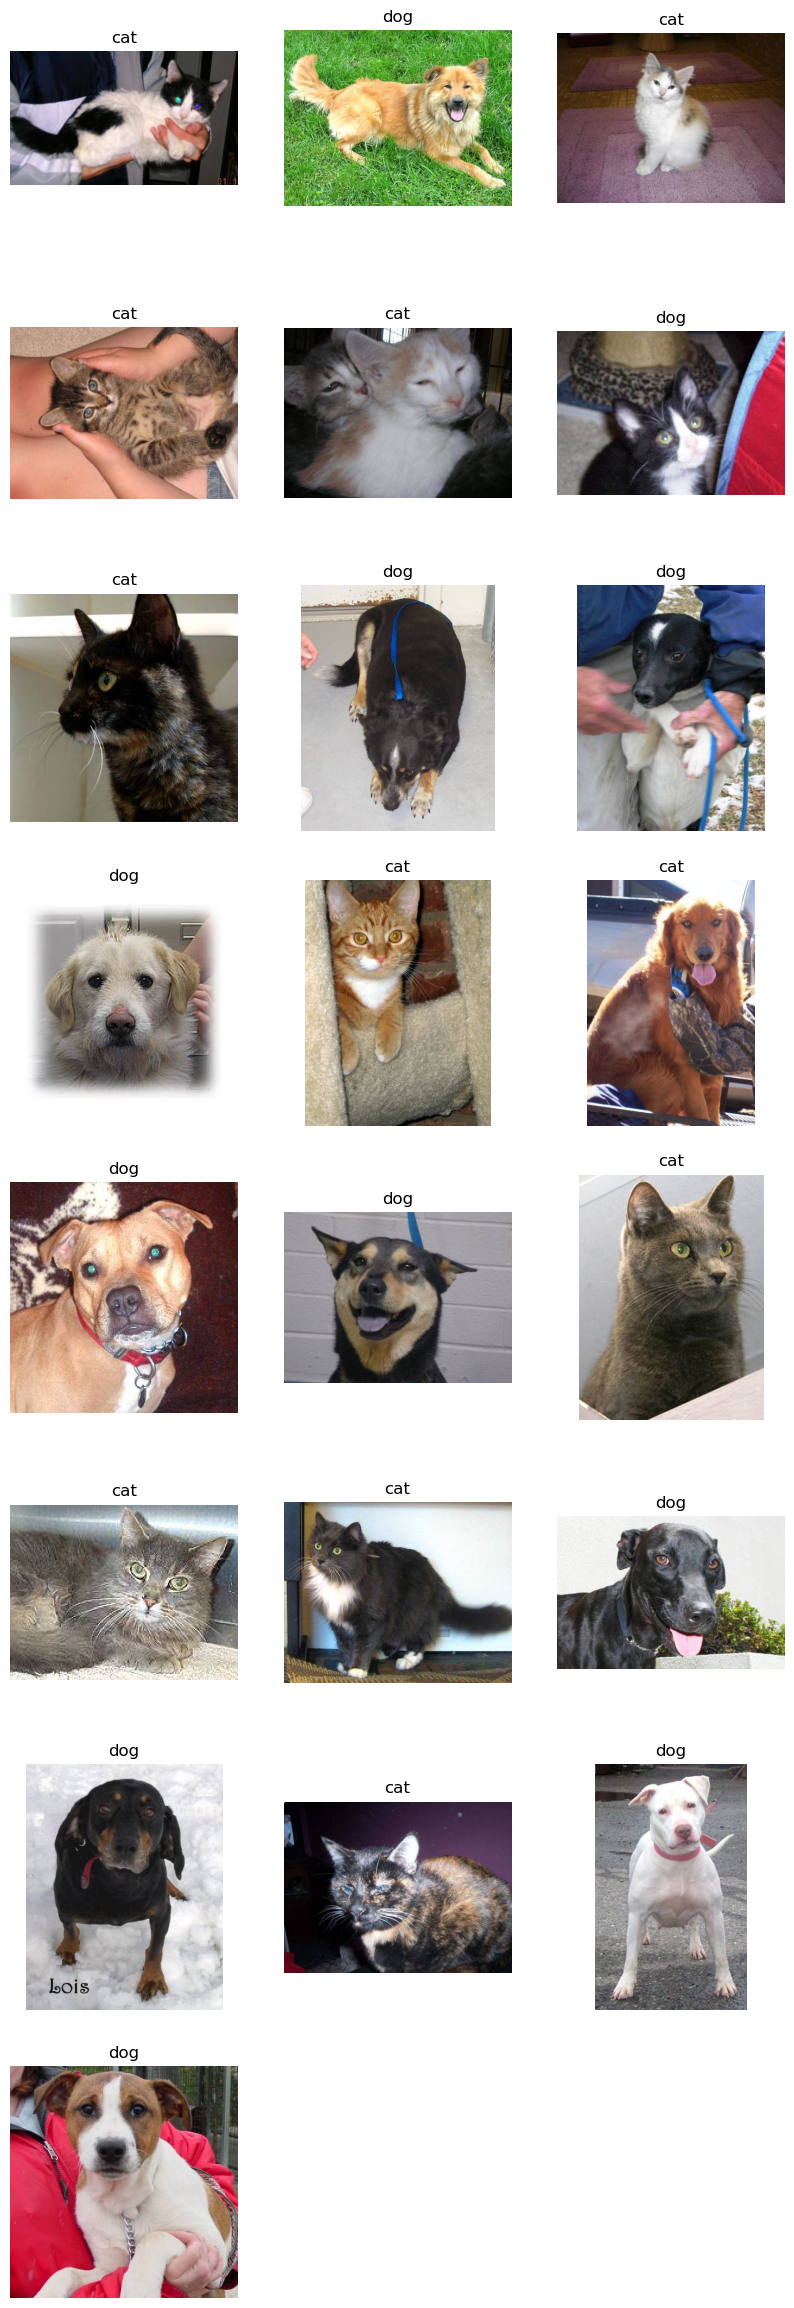

In [51]:
#load single image and predict its class using pre-trained model

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
import numpy as np
import os
import random

files = []
for root, dirs, filenames in os.walk('data/catdogs/testing_set'):
    for filename in filenames:
        if filename.endswith('.jpg'):
            files.append(os.path.join(root, filename))


random.shuffle(files)

print(files)


fig1 = plt.figure(figsize=(10,30))
index = 1
for file in files:
    image = load_img(file)
    image_data=load_img(file,target_size=(64,64))
    image_data=img_to_array(image_data)/255.0
    image_data=image_data.reshape(1,64,64,3)

    y_test_predict=model.predict(image_data)
    y_test_predict_class = np.round(y_test_predict).astype(int)

    plt.subplot(8,3,index)
    plt.title('cat' if y_test_predict_class[0] == 0 else 'dog')
    plt.imshow(image)
    plt.axis('off')
    index += 1
plt.show()

